In [1]:
# Imports all packages necessary or useful

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Opens our medical_clean data csv file for analysis

df = pd.read_csv(r"C:\Users\caleb\OneDrive\Desktop\WGU\D208 - Predictive Modeling\medical_clean.csv")

In [3]:
# Profiles our csv file following importing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Detects any duplicated observations in our data set

df.duplicated().value_counts()

False    10000
dtype: int64

In [6]:
# Detects any null values in our data set
# We might assume nulls and outliers are dealt with as this data set is "clean", however, we can quickly check for null values

df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
# For this project, we are interested in the following response variables to compare with our independent variable, 'Initial_days': 
# 'Age', 'Gender', 'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Asthma', 'Services'

# Categorical variables should be recast from objects for analysis

# Creates a dictionary assignment

rebool = {'No': 0, 'Yes': 1}

In [8]:
# Remaps boolean values to integers in our selected variables

df['ReAdmis'] = df['ReAdmis'].map(rebool)

In [9]:
# Remaps boolean values to integers in our selected variables

df['HighBlood'] = df['HighBlood'].map(rebool)

In [10]:
# Remaps boolean values to integers in our selected variables

df['Stroke'] = df['Stroke'].map(rebool)

In [11]:
# Remaps boolean values to integers in our selected variables

df['Overweight'] = df['Overweight'].map(rebool)

In [12]:
# Remaps boolean values to integers in our selected variables

df['Hyperlipidemia'] = df['Hyperlipidemia'].map(rebool)

In [13]:
# Remaps boolean values to integers in our selected variables

df['BackPain'] = df['BackPain'].map(rebool)

In [14]:
# Remaps boolean values to integers in our selected variables

df['Anxiety'] = df['Anxiety'].map(rebool)

In [15]:
# Remaps boolean values to integers in our selected variables

df['Asthma'] = df['Asthma'].map(rebool)

In [16]:
# Converts type from "object" to "category" for one hot encoding

df['Gender'] = df['Gender'].astype("category")

# Confirms data type recast was successful

df['Gender'].info()

# Displays and counts values within variable

df['Gender'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Gender
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [17]:
# Converts type from "object" to "category" for one hot encoding

df['Complication_risk'] = df['Complication_risk'].astype("category")

# Confirms data type recast was successful

df['Complication_risk'].info()

# Displays and counts values within variable

df['Complication_risk'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Complication_risk
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

In [18]:
# Converts type from "object" to "category" for one hot encoding

df['Services'] = df['Services'].astype("category")

# Confirms data type recast was successful

df['Services'].info()

# Displays and counts values within variable

df['Services'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Services
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.1 KB


Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

In [19]:
# Reviews our data set following re-expression of categorical data

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,No,Emergency Admission,1,0,Medium,0,Yes,Yes,0,1,1,Yes,No,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,0,18.940352,4,2,1,No,Emergency Admission,1,0,High,1,No,No,0,0,0,No,Yes,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,No,Elective Admission,1,0,Medium,1,No,Yes,0,0,0,No,No,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,0,16.576858,4,1,0,No,Elective Admission,0,1,Medium,0,Yes,No,0,0,0,No,Yes,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,Yes,Elective Admission,0,0,Low,0,No,No,1,0,0,Yes,No,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [20]:
# We can create a new data frame to include only the variables mentioned above

new_df = df[['Initial_days', 'Age', 'Gender', 'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Asthma', 'Services']]

In [21]:
# Calls and profiles the new data fram containing only variables we are concerned with regarding our research question
# No object datatypes are present

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Initial_days       10000 non-null  float64 
 1   Age                10000 non-null  int64   
 2   Gender             10000 non-null  category
 3   ReAdmis            10000 non-null  int64   
 4   Doc_visits         10000 non-null  int64   
 5   Full_meals_eaten   10000 non-null  int64   
 6   HighBlood          10000 non-null  int64   
 7   Stroke             10000 non-null  int64   
 8   Complication_risk  10000 non-null  category
 9   Overweight         10000 non-null  int64   
 10  Hyperlipidemia     10000 non-null  int64   
 11  BackPain           10000 non-null  int64   
 12  Anxiety            10000 non-null  int64   
 13  Asthma             10000 non-null  int64   
 14  Services           10000 non-null  category
dtypes: category(3), float64(1), int64(11)
memory usage: 96

In [22]:
# Creates dummy variables for our nominal categorical variables with more than 2 values to ensure K-1 is true and to avoid perfect multicollinearity

new_df = pd.get_dummies(df, columns=['Gender', 'Complication_risk', 'Services'], drop_first=True)

In [23]:
# Lists columns in new data set to copy/paste into code and delete variables we aren't interested in via df.drop

new_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8', 'Gender_Male', 'Gender_Nonbinary',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI'],
      dtype='object')

In [24]:
# Creates a new dataframe that drops variables we aren't interested in

new_df = new_df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Income', 'Marital', 'VitD_levels', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'Arthritis', 'Diabetes', 'Allergic_rhinitis', 'Reflux_esophagitis', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [25]:
# Returns a snapshot of our new columns

new_df.columns

Index(['Age', 'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Asthma', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI'],
      dtype='object')

In [26]:
# The new_df data frame we created only includes variables we are interested in as well as nominal dummy variables

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  int64  
 1   ReAdmis                   10000 non-null  int64  
 2   Doc_visits                10000 non-null  int64  
 3   Full_meals_eaten          10000 non-null  int64  
 4   HighBlood                 10000 non-null  int64  
 5   Stroke                    10000 non-null  int64  
 6   Overweight                10000 non-null  int64  
 7   Hyperlipidemia            10000 non-null  int64  
 8   BackPain                  10000 non-null  int64  
 9   Anxiety                   10000 non-null  int64  
 10  Asthma                    10000 non-null  int64  
 11  Initial_days              10000 non-null  float64
 12  Gender_Male               10000 non-null  uint8  
 13  Gender_Nonbinary          10000 non-null  uint8  
 14  Complic

In [27]:
# Views values contained in our variables to confirm successful re-expression

new_df.head()

,Age,ReAdmis,Doc_visits,Full_meals_eaten,HighBlood,Stroke,Overweight,Hyperlipidemia,BackPain,Anxiety,Asthma,Initial_days,Gender_Male,Gender_Nonbinary,Complication_risk_Low,Complication_risk_Medium,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,0,6,0,1,0,0,0,1,1,1,10.585770,1,0,0,1,0,0,0
1,51,0,4,2,1,0,1,0,0,0,0,15.129562,0,0,0,0,0,1,0
2,53,0,4,1,1,0,1,0,0,0,0,4.772177,0,0,0,1,0,0,0
3,78,0,4,1,0,1,0,0,0,0,1,1.714879,1,0,0,1,0,0,0
4,22,0,5,0,0,0,0,1,0,0,0,1.254807,0,0,1,0,1,0,0


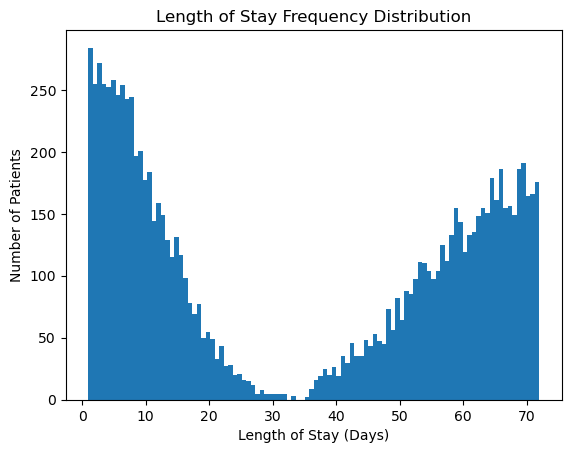

In [28]:
# Creates a histogram of our independent variable

plt.hist(new_df['Initial_days'], bins=100)
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Number of Patients")
plt.title("Length of Stay Frequency Distribution")
plt.show()

# Shape appears bimodal, somewhat symmetrical with a valley very close to our mean

In [29]:
# Helps describe our independent variable

new_df['Initial_days'].describe()

# We see our lowest number of days is 1 (per our dictionary, this is where tracking of this variable begins) and our longest stay is 71 full days

# Mean length of stay is 34 days and a very large standard deviation exists

# A surprisingly large number of patients were admitted beyond our mean length of stay

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [30]:
# Describes 'Age'

new_df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

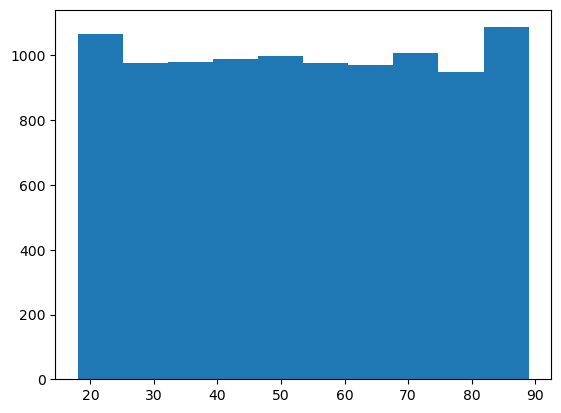

In [31]:
# Visualizes 'Age' as a histogram

plt.hist(new_df['Age'])
plt.show()

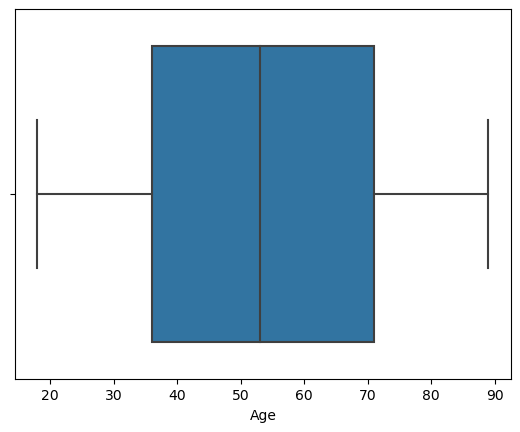

In [32]:
# Visualizes 'Age' to detect outliers

boxplot=sns.boxplot(x='Age',data=new_df)

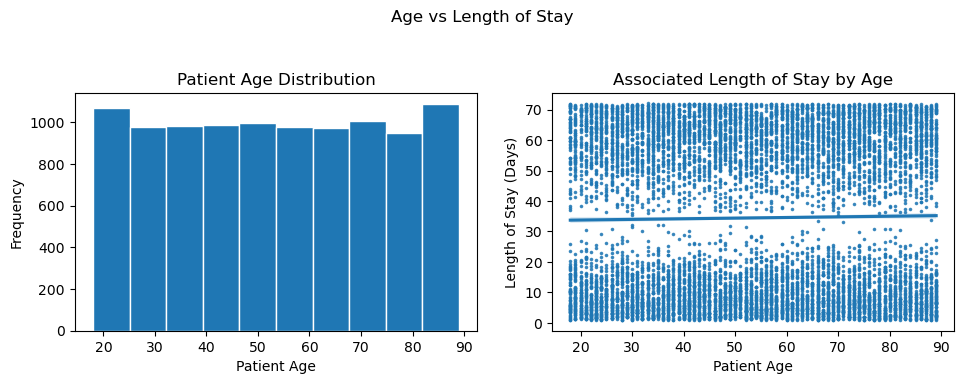

In [33]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Age vs Length of Stay')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Patient Age Distribution')
plt.hist(data=new_df, x='Age', edgecolor="white")
plt.xlabel('Patient Age')
plt.ylabel('Frequency')

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
plt.title('Associated Length of Stay by Age')
sns.regplot(data=new_df, x='Age', y='Initial_days', scatter_kws={"s": 2.5})
plt.xlabel('Patient Age')
plt.ylabel('Length of Stay (Days)')

plt.tight_layout(pad=2)
plt.show()

In [34]:
# Describes 'Gender'

df['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

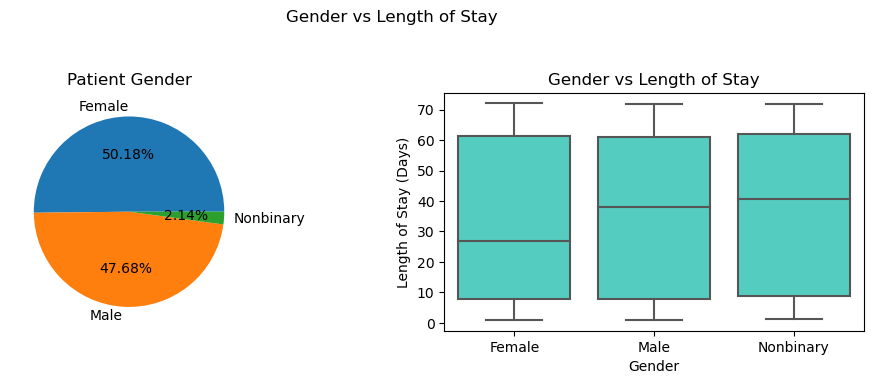

In [35]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Gender vs Length of Stay')

# Creates a univariate visualization; uses 'df' vs 'new_df' as we have created dummies and dropped the original variable

plt.subplot(1, 2, 1)
genders = df['Gender'].value_counts()
gendercats = ['Female', 'Male', 'Nonbinary']
plt.title('Patient Gender')
plt.pie(genders, labels=gendercats, autopct="%.2F%%")

# Creates a bivariate visualization; uses 'df' vs 'new_df' as we have created dummies and dropped the original variable

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Gender", y="Initial_days", color="turquoise").set(title='Gender vs Length of Stay', ylabel='Length of Stay (Days)')

plt.tight_layout(pad=2)
plt.show()

In [36]:
# Describes 'ReAdmis'

df['ReAdmis'].value_counts()

0    6331
1    3669
Name: ReAdmis, dtype: int64

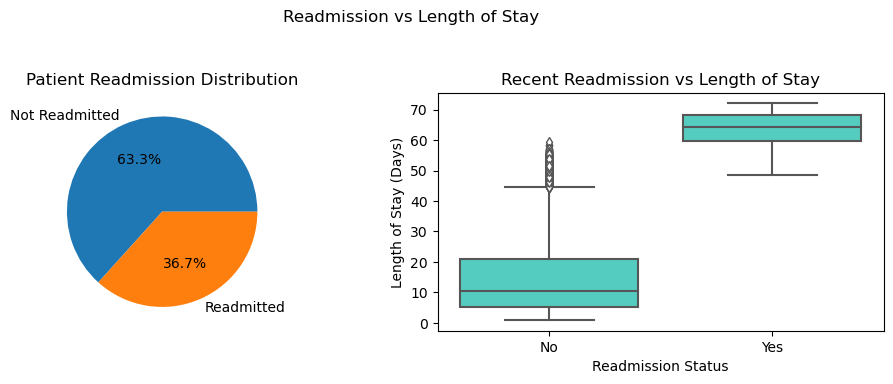

In [37]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Readmission vs Length of Stay')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Patient Readmission Distribution')
ptreadmit = new_df['ReAdmis'].value_counts()
admitcat = ['Not Readmitted', 'Readmitted']
plt.pie(ptreadmit, labels=admitcat, autopct="%.1F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x="ReAdmis", y="Initial_days", color='turquoise', flierprops={'markersize': 5, 'markerfacecolor': 'white'}).set(title='Recent Readmission vs Length of Stay', xlabel='Readmission Status', ylabel='Length of Stay (Days)')
plt.xticks(ticks=[0,1], labels=(['No', 'Yes']))

plt.tight_layout(pad=2)
plt.show()

In [38]:
# Describes 'Doc_visits'

df['Doc_visits'].value_counts().sort_index()

1       6
2      58
3     595
4    2385
5    3823
6    2436
7     634
8      61
9       2
Name: Doc_visits, dtype: int64

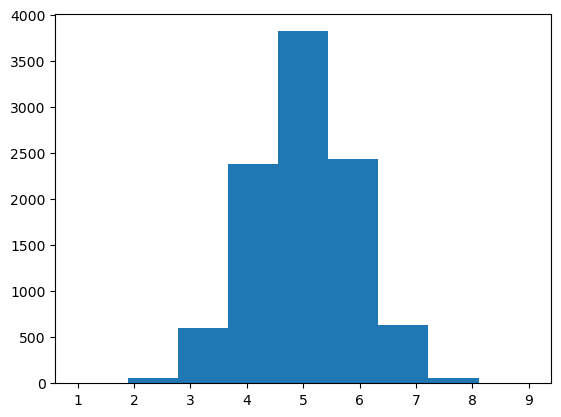

In [39]:
# Visualizes 'Doc_visits' as a histogram

plt.hist(new_df['Doc_visits'], bins=9)
plt.show()

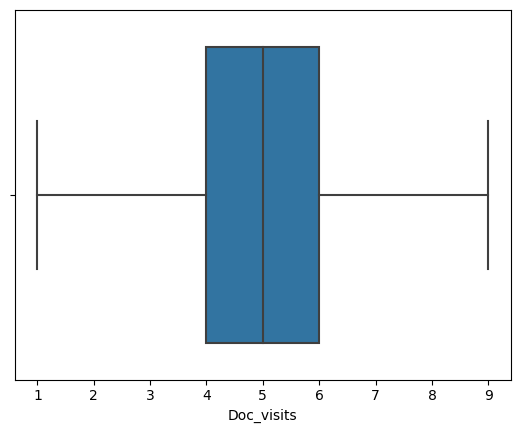

In [40]:
# Visualizes 'Doc_visits' to detect outliers

boxplot=sns.boxplot(x='Doc_visits',data=new_df)

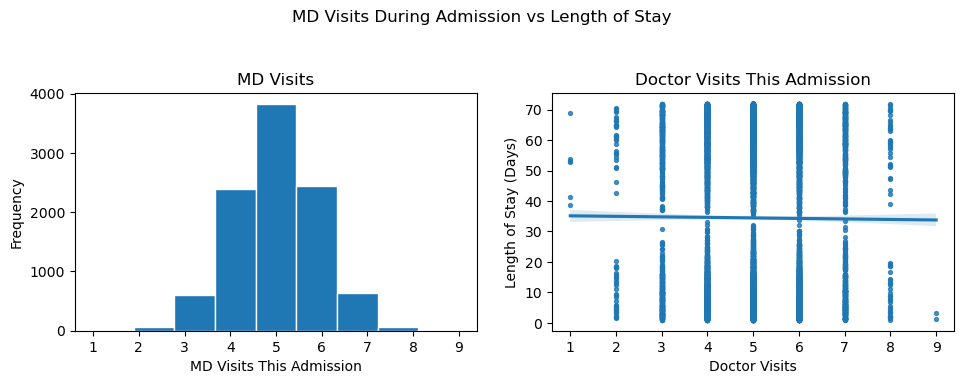

In [41]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('MD Visits During Admission vs Length of Stay') 

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('MD Visits')
plt.hist(data=new_df, x='Doc_visits', bins=9, edgecolor="white")
plt.xlabel('MD Visits This Admission')
plt.ylabel('Frequency')

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
plt.title('Doctor Visits This Admission')
sns.regplot(data=new_df, x='Doc_visits', y='Initial_days', scatter_kws={"s": 8})
plt.xlabel('Doctor Visits')
plt.ylabel('Length of Stay (Days)')

plt.tight_layout(pad=2)
plt.show()

In [42]:
# Describes 'Full_meals_eaten'

df['Full_meals_eaten'].value_counts().sort_index()

0    3715
1    3615
2    1856
3     612
4     169
5      25
6       6
7       2
Name: Full_meals_eaten, dtype: int64

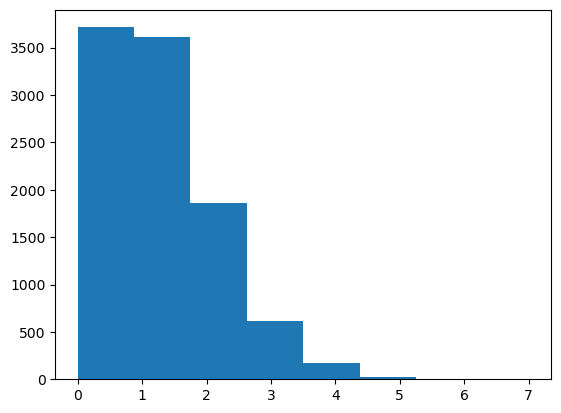

In [43]:
# Visualizes 'Full_meals_eaten' as a histogram

plt.hist(new_df['Full_meals_eaten'], bins=8)
plt.show()

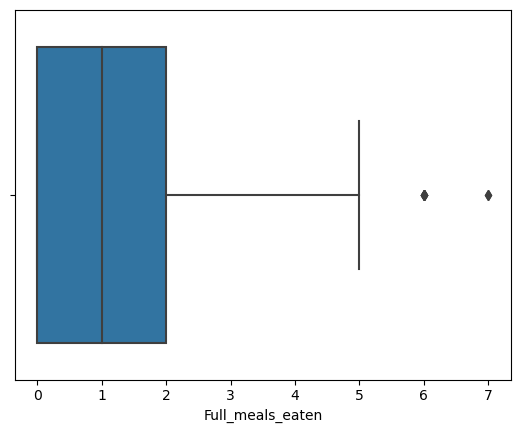

In [44]:
# Visualizes 'Full_meals_eaten' to detect outliers

boxplot=sns.boxplot(x='Full_meals_eaten',data=new_df)

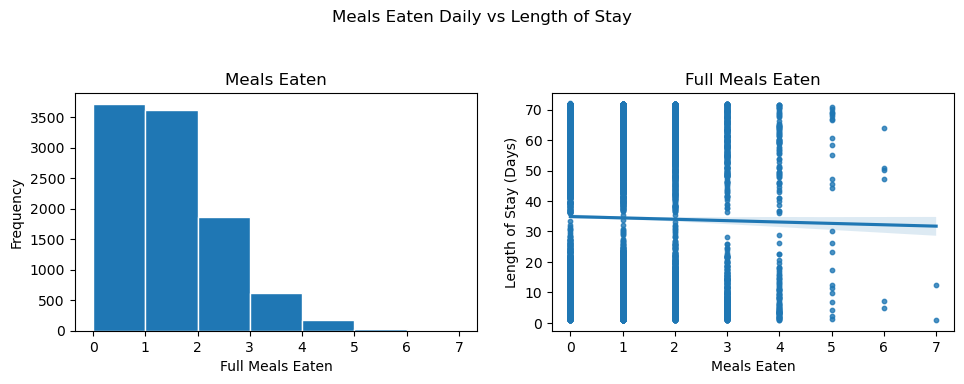

In [45]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Meals Eaten Daily vs Length of Stay')

# Assumes variable is tracked daily; provided dictionary is unclear

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Meals Eaten')
plt.hist(data=new_df, x='Full_meals_eaten', bins=7, edgecolor="white")
plt.xlabel('Full Meals Eaten')
plt.ylabel('Frequency')

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
plt.title('Full Meals Eaten')
sns.regplot(data=new_df, x='Full_meals_eaten', y='Initial_days', scatter_kws={"s": 10})
plt.xlabel('Meals Eaten')
plt.ylabel('Length of Stay (Days)')

plt.tight_layout(pad=2)
plt.show()

In [46]:
# Describes 'HighBlood'

df['HighBlood'].value_counts()

0    5910
1    4090
Name: HighBlood, dtype: int64

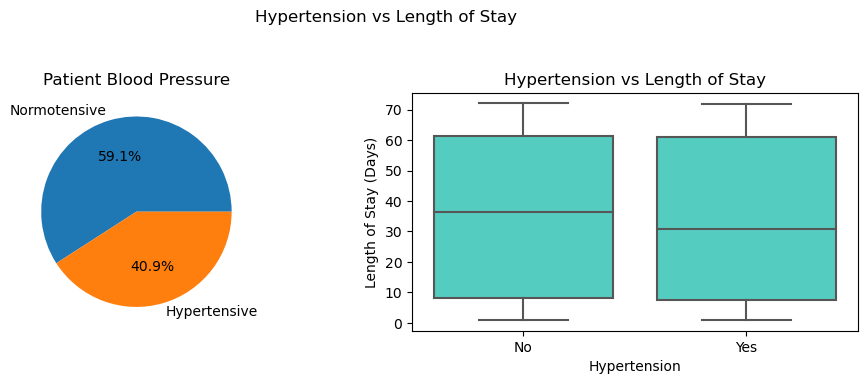

In [47]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Hypertension vs Length of Stay')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Patient Blood Pressure')
hypertens = new_df['HighBlood'].value_counts()
bpcat = ['Normotensive', 'Hypertensive']
plt.pie(hypertens, labels=bpcat, autopct="%.1F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x="HighBlood", y="Initial_days", color='turquoise').set(title='Hypertension vs Length of Stay', xlabel='Hypertension', ylabel='Length of Stay (Days)')
plt.xticks(ticks=[0,1], labels=(['No', 'Yes']))

plt.tight_layout(pad=2)
plt.show()

In [48]:
# Describes 'Stroke'

df['Stroke'].value_counts()

0    8007
1    1993
Name: Stroke, dtype: int64

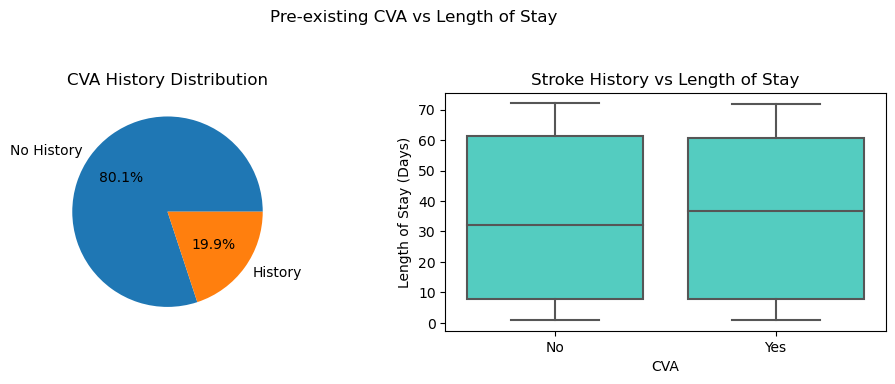

In [49]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Pre-existing CVA vs Length of Stay')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('CVA History Distribution')
cva = new_df['Stroke'].value_counts()
cvacat = ['No History', 'History']
plt.pie(cva, labels=cvacat, autopct="%.1F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x="Stroke", y="Initial_days", color='turquoise').set(title='Stroke History vs Length of Stay', xlabel='CVA', ylabel='Length of Stay (Days)')
plt.xticks(ticks=[0,1], labels=(['No', 'Yes']))

plt.tight_layout(pad=2)
plt.show()

In [50]:
# Describes 'Complication_risk'

df['Complication_risk'].value_counts()

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

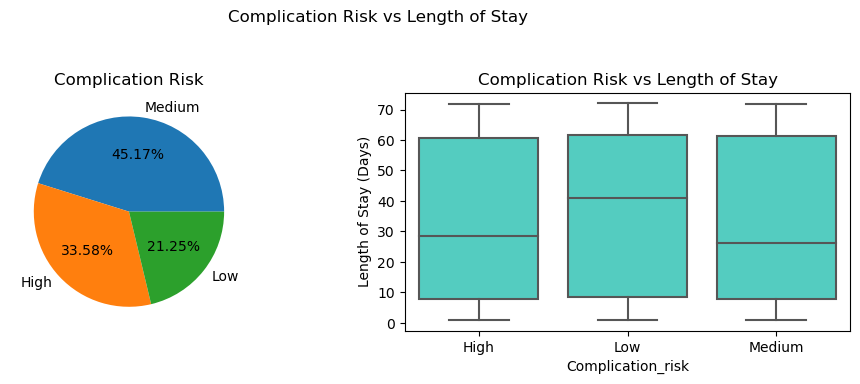

In [51]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Complication Risk vs Length of Stay')

# Creates a univariate visualization; uses 'df' vs 'new_df' as we have created dummies and dropped the original variable

plt.subplot(1, 2, 1)
plt.title('Complication Risk')
crisk = df['Complication_risk'].value_counts()
riskcats = ['Medium', 'High', 'Low']
plt.pie(crisk, labels=riskcats, autopct="%.2F%%")

# Creates a bivariate visualization; uses 'df' vs 'new_df' as we have created dummies and dropped the original variable

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Complication_risk", y="Initial_days", color="turquoise").set(title='Complication Risk vs Length of Stay', ylabel='Length of Stay (Days)')

plt.tight_layout(pad=2)
plt.show()

In [52]:
# Describes 'Overweight'

df['Overweight'].value_counts()

1    7094
0    2906
Name: Overweight, dtype: int64

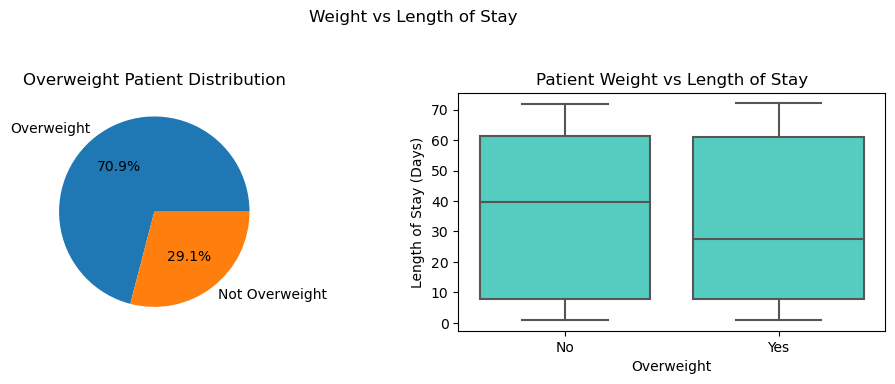

In [53]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Weight vs Length of Stay')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Overweight Patient Distribution')
oweight = new_df['Overweight'].value_counts()
weightcat = ['Overweight', 'Not Overweight']
plt.pie(oweight, labels=weightcat, autopct="%.1F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x="Overweight", y="Initial_days", color='turquoise').set(title='Patient Weight vs Length of Stay', xlabel='Overweight', ylabel='Length of Stay (Days)')
plt.xticks(ticks=[0,1], labels=(['No', 'Yes']))

plt.tight_layout(pad=2)
plt.show()

In [54]:
# Describes 'Hyperlipidemia'

df['Hyperlipidemia'].value_counts()

0    6628
1    3372
Name: Hyperlipidemia, dtype: int64

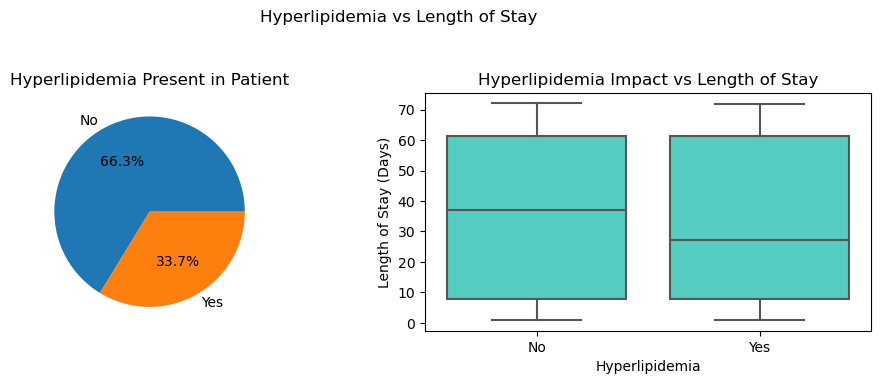

In [55]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Hyperlipidemia vs Length of Stay')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Hyperlipidemia Present in Patient')
hyperlip = new_df['Hyperlipidemia'].value_counts()
lipcat = ['No', 'Yes']
plt.pie(hyperlip, labels=lipcat, autopct="%.1F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x="Hyperlipidemia", y="Initial_days", color='turquoise').set(title='Hyperlipidemia Impact vs Length of Stay', xlabel='Hyperlipidemia', ylabel='Length of Stay (Days)')
plt.xticks(ticks=[0,1], labels=(['No', 'Yes']))

plt.tight_layout(pad=2)
plt.show()

In [56]:
# Describes 'BackPain'

df['BackPain'].value_counts()

0    5886
1    4114
Name: BackPain, dtype: int64

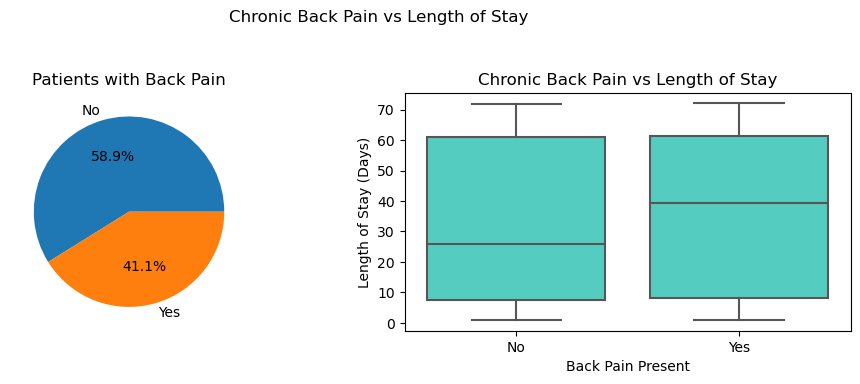

In [57]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Chronic Back Pain vs Length of Stay')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Patients with Back Pain')
bpain = new_df['BackPain'].value_counts()
backpcat = ['No', 'Yes']
plt.pie(bpain, labels=backpcat, autopct="%.1F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x="BackPain", y="Initial_days", color='turquoise').set(title='Chronic Back Pain vs Length of Stay', xlabel='Back Pain Present', ylabel='Length of Stay (Days)')
plt.xticks(ticks=[0,1], labels=(['No', 'Yes']))

plt.tight_layout(pad=2)
plt.show()

In [58]:
# Describes 'Anxiety'

df['Anxiety'].value_counts()

0    6785
1    3215
Name: Anxiety, dtype: int64

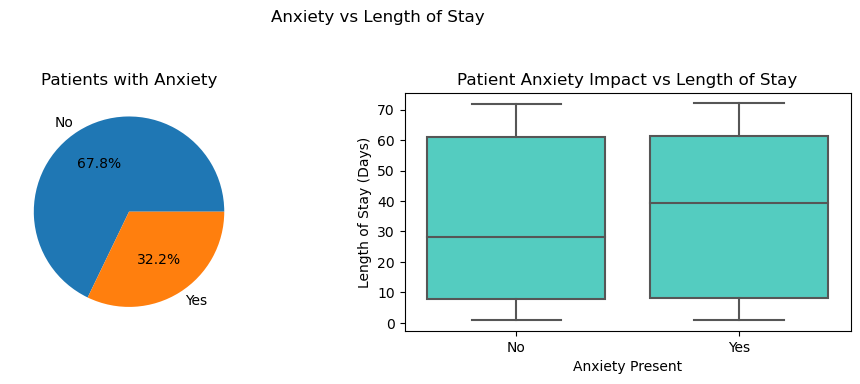

In [59]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Anxiety vs Length of Stay')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Patients with Anxiety')
anxpt = new_df['Anxiety'].value_counts()
anxcat = ['No', 'Yes']
plt.pie(anxpt, labels=anxcat, autopct="%.1F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x="Anxiety", y="Initial_days", color='turquoise').set(title='Patient Anxiety Impact vs Length of Stay', xlabel='Anxiety Present', ylabel='Length of Stay (Days)')
plt.xticks(ticks=[0,1], labels=(['No', 'Yes']))

plt.tight_layout(pad=2)
plt.show()

In [60]:
# Describes 'Asthma'

df['Asthma'].value_counts()

0    7107
1    2893
Name: Asthma, dtype: int64

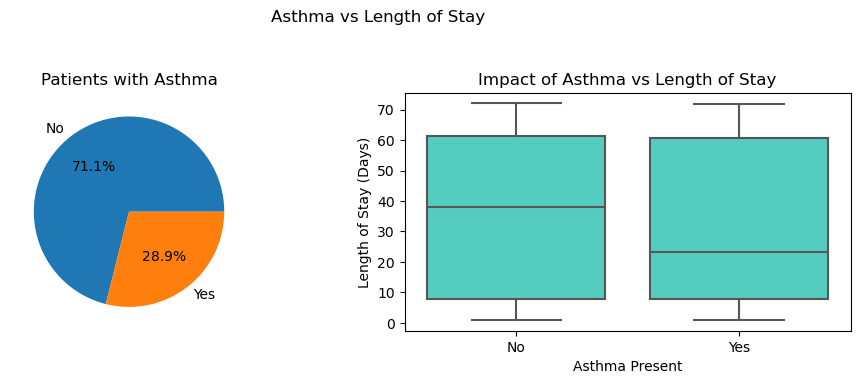

In [61]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Asthma vs Length of Stay')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Patients with Asthma')
asthpt = new_df['Asthma'].value_counts()
asthcat = ['No', 'Yes']
plt.pie(asthpt, labels=asthcat, autopct="%.1F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x="Asthma", y="Initial_days", color='turquoise').set(title='Impact of Asthma vs Length of Stay', xlabel='Asthma Present', ylabel='Length of Stay (Days)')
plt.xticks(ticks=[0,1], labels=(['No', 'Yes']))

plt.tight_layout(pad=2)
plt.show()

In [62]:
# Describes 'Services'

df['Services'].value_counts()

Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

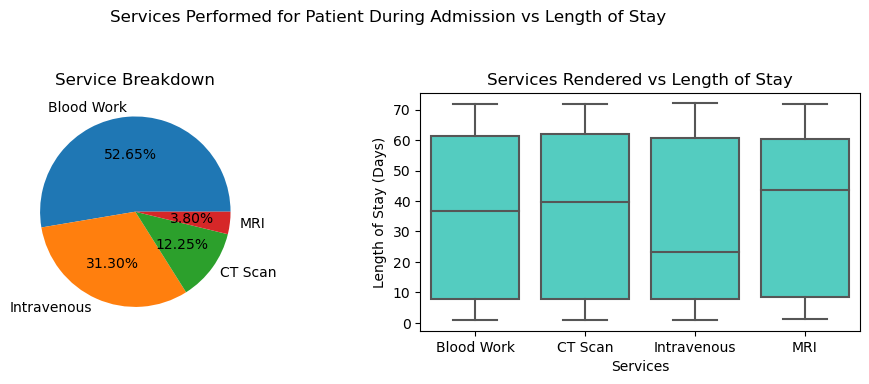

In [63]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Services Performed for Patient During Admission vs Length of Stay')

# Creates a univariate visualization; uses 'df' vs 'new_df' as we have created dummies and dropped the original variable

plt.subplot(1, 2, 1)
plt.title('Service Breakdown')
medservs = df['Services'].value_counts()
servcats = ['Blood Work', 'Intravenous', 'CT Scan', 'MRI']
plt.pie(medservs, labels=servcats, autopct="%.2F%%")

# Creates a bivariate visualization; uses 'df' vs 'new_df' as we have created dummies and dropped the original variable

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Services", y="Initial_days", color="turquoise").set(title='Services Rendered vs Length of Stay', ylabel='Length of Stay (Days)')

plt.tight_layout(pad=2)
plt.show()

In [64]:
# Creates an initial MLR model with a y-intercept at 1

y = new_df['Initial_days']
x1 = new_df[['Age', 'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Asthma', 'Gender_Male', 'Gender_Nonbinary',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]

X = sm.add_constant(x1)
results1 = sm.OLS(y,X).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1461.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:16   Log-Likelihood:                -40436.
No. Observations:               10000   AIC:                         8.091e+04
Df Residuals:                    9981   BIC:                         8.105e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [65]:
# Calculates residual squared error for our initial model

firstmodel = np.sqrt(results1.scale)
firstmodel

13.81301074535945

In [66]:
# Checks variable inflation factor
# Variables with VIF > 10 will be eliminated

X = new_df[['Age', 'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Asthma', 'Gender_Male', 'Gender_Nonbinary',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 

print(vif)

                    Variable        VIF
0                        Age   6.550222
1                    ReAdmis   1.562788
2                 Doc_visits  10.607163
3           Full_meals_eaten   1.943720
4                  HighBlood   1.675419
5                     Stroke   1.242641
6                 Overweight   3.260743
7             Hyperlipidemia   1.485603
8                   BackPain   1.682255
9                    Anxiety   1.458711
10                    Asthma   1.395569
11               Gender_Male   1.902164
12          Gender_Nonbinary   1.042639
13     Complication_risk_Low   1.582992
14  Complication_risk_Medium   2.245849
15          Services_CT Scan   1.227226
16      Services_Intravenous   1.566213
17              Services_MRI   1.069640


In [67]:
# 'Doc_visits' is removed due to VIF > 10

X = new_df[['Age', 'ReAdmis', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Asthma', 'Gender_Male', 'Gender_Nonbinary',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 

print(vif)

                    Variable       VIF
0                        Age  4.976754
1                    ReAdmis  1.537743
2           Full_meals_eaten  1.886880
3                  HighBlood  1.643594
4                     Stroke  1.233863
5                 Overweight  2.991063
6             Hyperlipidemia  1.468209
7                   BackPain  1.650008
8                    Anxiety  1.438463
9                     Asthma  1.385339
10               Gender_Male  1.843310
11          Gender_Nonbinary  1.040576
12     Complication_risk_Low  1.526627
13  Complication_risk_Medium  2.135906
14          Services_CT Scan  1.213977
15      Services_Intravenous  1.533108
16              Services_MRI  1.066655


In [68]:
# We can further reduce variables if their corresponding P value is > .05

# Begins our model reduction without 'Doc_visits'

y = new_df['Initial_days']
x1 = new_df[['Age', 'ReAdmis', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Asthma', 'Gender_Male', 'Gender_Nonbinary',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1546.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:16   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.091e+04
Df Residuals:                    9982   BIC:                         8.104e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [69]:
# Continues our model reduction without 'Asthma'

y = new_df['Initial_days']
x1 = new_df[['Age', 'ReAdmis', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Gender_Male', 'Gender_Nonbinary',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1643.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:16   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.091e+04
Df Residuals:                    9983   BIC:                         8.103e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [70]:
# Continues our model reduction without 'Gender_Nonbinary'

y = new_df['Initial_days']
x1 = new_df[['Age', 'ReAdmis', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Gender_Male',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1753.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:16   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.091e+04
Df Residuals:                    9984   BIC:                         8.102e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [71]:
# Continues our model reduction without 'Gender_Male'

y = new_df['Initial_days']
x1 = new_df[['Age', 'ReAdmis', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1878.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:16   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9985   BIC:                         8.101e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [72]:
# Continues our model reduction without 'Services_MRI'

y = new_df['Initial_days']
x1 = new_df[['Age', 'ReAdmis', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan',
       'Services_Intravenous']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2023.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:16   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9986   BIC:                         8.100e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [73]:
# Continues our model reduction without 'Services_Intravenous'

y = new_df['Initial_days']
x1 = new_df[['Age', 'ReAdmis', 'Full_meals_eaten', 'HighBlood',
       'Stroke', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2192.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:16   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9987   BIC:                         8.099e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [74]:
# Continues our model reduction without 'Stroke'

y = new_df['Initial_days']
x1 = new_df[['Age', 'ReAdmis', 'Full_meals_eaten', 'HighBlood', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2391.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:16   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9988   BIC:                         8.098e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
# Continues our model reduction without 'Age'

y = new_df['Initial_days']
x1 = new_df[['ReAdmis', 'Full_meals_eaten', 'HighBlood', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2630.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:17   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9989   BIC:                         8.098e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [76]:
# Continues our model reduction without 'Overweight'

y = new_df['Initial_days']
x1 = new_df[['ReAdmis', 'Full_meals_eaten', 'HighBlood', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2923.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:17   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9990   BIC:                         8.097e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [77]:
# Continues our model reduction without 'Complication_risk_Medium'

y = new_df['Initial_days']
x1 = new_df[['ReAdmis', 'Full_meals_eaten', 'HighBlood', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Complication_risk_Low', 'Services_CT Scan']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     3288.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:17   Log-Likelihood:                -40438.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9991   BIC:                         8.096e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.47

In [78]:
# Continues our model reduction without 'BackPain'

y = new_df['Initial_days']
x1 = new_df[['ReAdmis', 'Full_meals_eaten', 'HighBlood', 'Hyperlipidemia', 'Anxiety',
       'Complication_risk_Low', 'Services_CT Scan']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     3758.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:17   Log-Likelihood:                -40439.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9992   BIC:                         8.095e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.59

In [79]:
# Continues our model reduction without 'Full_meals_eaten'

y = new_df['Initial_days']
x1 = new_df[['ReAdmis', 'HighBlood', 'Hyperlipidemia', 'Anxiety',
       'Complication_risk_Low', 'Services_CT Scan']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     4383.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:17   Log-Likelihood:                -40439.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9993   BIC:                         8.094e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.42

In [80]:
# Continues our model reduction without 'Hyperlipidemia'

y = new_df['Initial_days']
x1 = new_df[['ReAdmis', 'HighBlood', 'Anxiety',
       'Complication_risk_Low', 'Services_CT Scan']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     5259.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:17   Log-Likelihood:                -40440.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9994   BIC:                         8.094e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.28

In [81]:
# Continues our model reduction without 'HighBlood'

y = new_df['Initial_days']
x1 = new_df[['ReAdmis', 'Anxiety',
       'Complication_risk_Low', 'Services_CT Scan']]

X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     6573.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:17   Log-Likelihood:                -40441.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9995   BIC:                         8.093e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.11

In [82]:
# Continues our model reduction without 'Anxiety'

y = new_df['Initial_days']
x1 = new_df[['ReAdmis', 'Complication_risk_Low', 'Services_CT Scan']]

X = sm.add_constant(x1)
resultsx = sm.OLS(y,X).fit()
print(resultsx.summary())

# All of our p values are < .05 in this reduced data set

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     8760.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:17   Log-Likelihood:                -40443.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9996   BIC:                         8.092e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.29

In [83]:
# Calculates residual squared error for our final reduced model

finalmodel = np.sqrt(resultsx.scale)
finalmodel

13.812558509736247

In [84]:
# Compares the residual error of our initial model vs our reduced model

print(firstmodel)
print(finalmodel)

# There is a negligible difference in improvement of the reduced model
# This reduced model represents a residual of about 13 days, which is less within 1 standard deviation of our 'Initial_days' mean

13.81301074535945
13.812558509736247


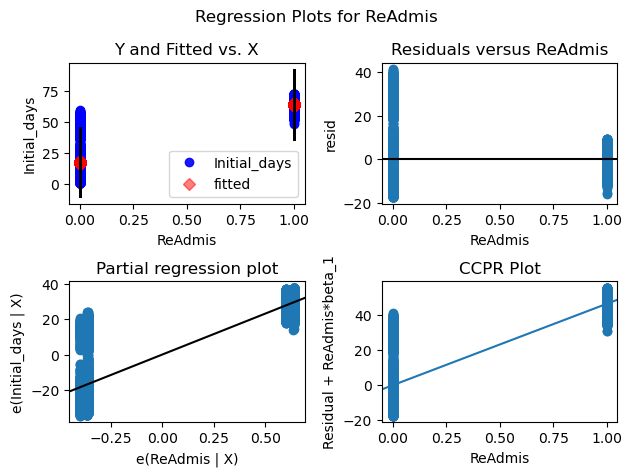

In [85]:
# Creates a figure including multiple residual plots to check assumptions: 'ReAdmis'

fig = sm.graphics.plot_regress_exog(resultsx, 'ReAdmis')
plt.rc("figure", figsize=(10, 8))
fig.tight_layout(pad=1.0)

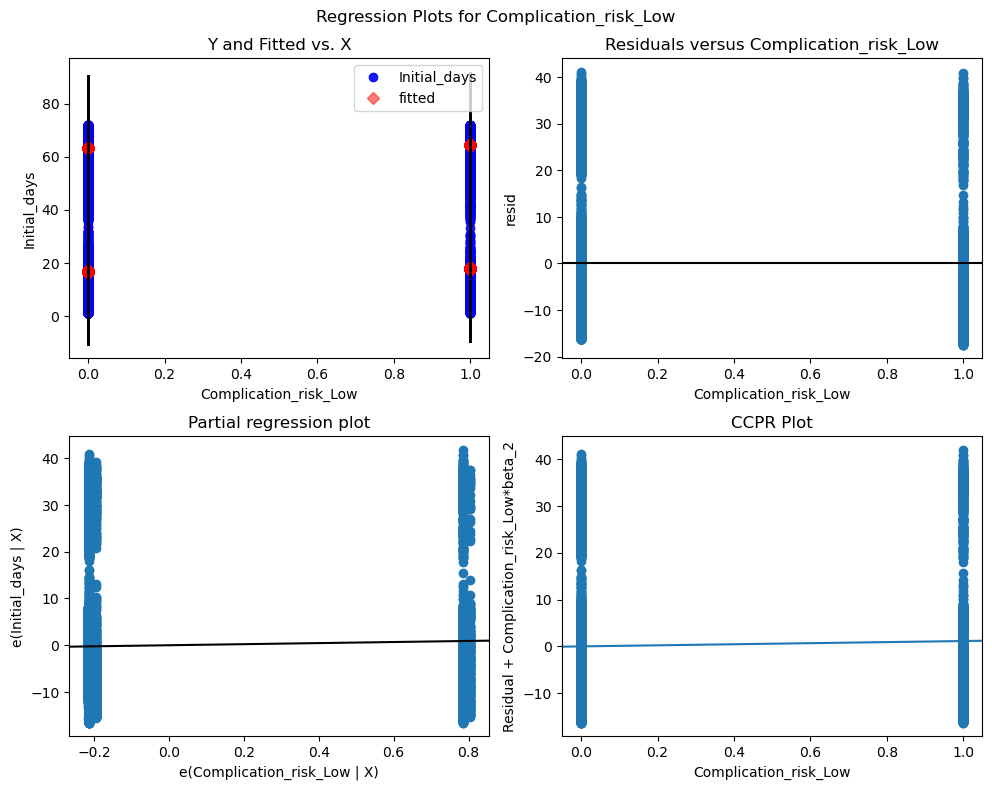

In [86]:
# Creates a figure including multiple residual plots to check assumptions: 'Complication_risk_Low'

fig = sm.graphics.plot_regress_exog(resultsx, 'Complication_risk_Low')
plt.rc("figure", figsize=(10, 8))
fig.tight_layout(pad=1.0)

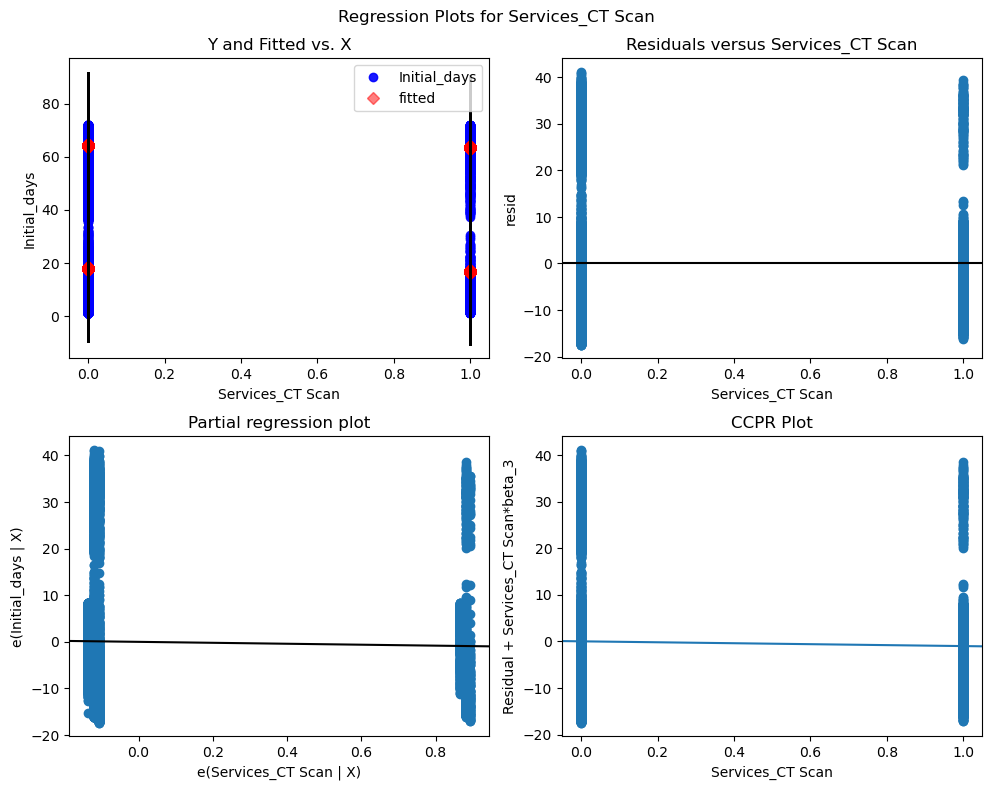

In [87]:
# Creates a figure including multiple residual plots to check assumptions: 'Services_CT Scan'

fig = sm.graphics.plot_regress_exog(resultsx, 'Services_CT Scan')
plt.rc("figure", figsize=(10, 8))
fig.tight_layout(pad=1.0)

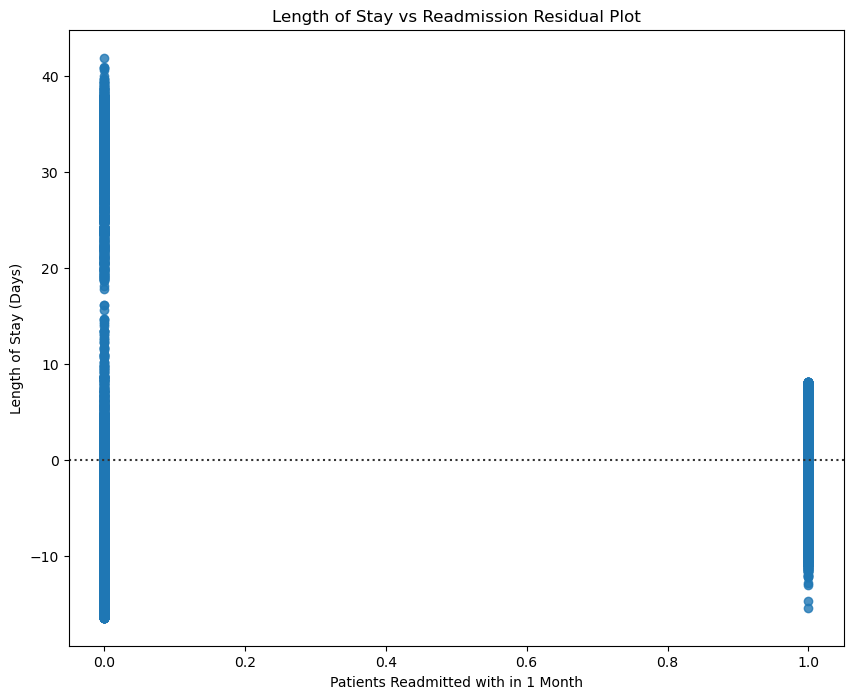

In [88]:
# Creates a residual plot for 'ReAdmis' vs 'Initial_days' with seaborn

sns.residplot(x='ReAdmis', y='Initial_days', data=new_df) 
plt.xlabel('Patients Readmitted with in 1 Month')
plt.ylabel('Length of Stay (Days)')
plt.title('Length of Stay vs Readmission Residual Plot')
plt.show() 

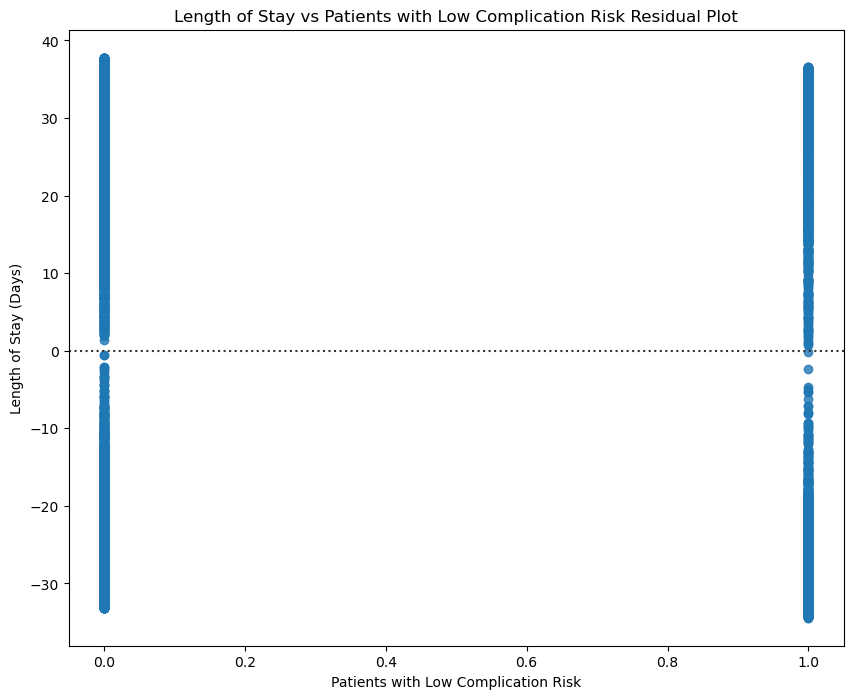

In [89]:
# Creates a residual plot for 'Complication_risk_Low' vs 'Initial_days' with seaborn

sns.residplot(x='Complication_risk_Low', y='Initial_days', data=new_df) 
plt.xlabel('Patients with Low Complication Risk')
plt.ylabel('Length of Stay (Days)')
plt.title('Length of Stay vs Patients with Low Complication Risk Residual Plot')
plt.show() 

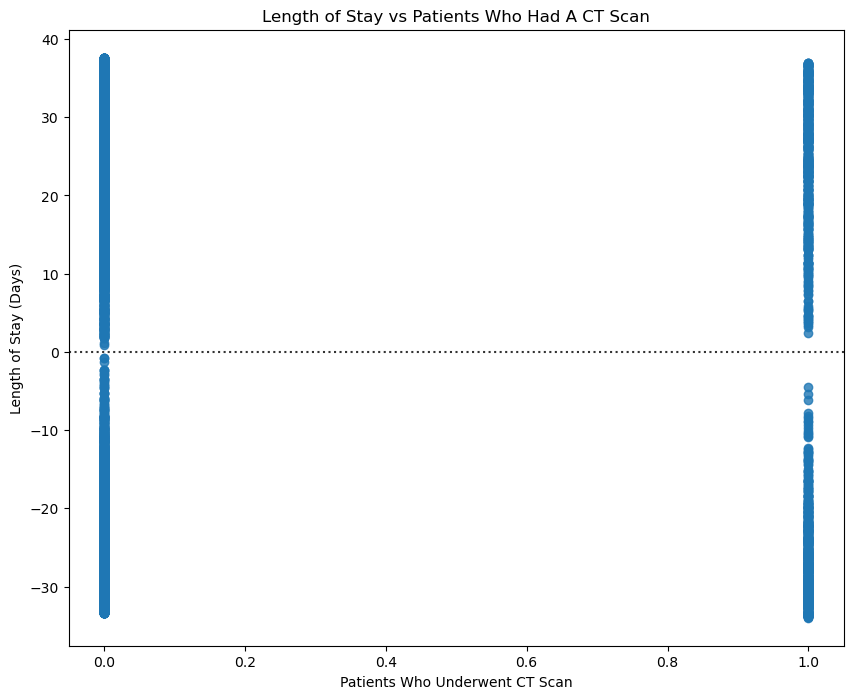

In [90]:
# Creates a residual plot for 'Services_CT Scan' vs 'Initial_days' with seaborn

sns.residplot(x='Services_CT Scan', y='Initial_days', data=new_df) 
plt.xlabel('Patients Who Underwent CT Scan')
plt.ylabel('Length of Stay (Days)')
plt.title('Length of Stay vs Patients Who Had A CT Scan')
plt.show() 

In [91]:
# Our final model follows: Y = 17.2902 + 46.4606(ReAdmis) + 1.1465(Complication_risk_low) – 1.1097(Services_CT Scan)
# In this model, 17.2902 is our constant value at the y-intercept. We will also assume the following: 
# A one-point increase in ‘ReAdmis’ will result in an increase of 46.4606 days admitted. 
# A one-point increase in ‘Complication_risk_low’ will result in an increase in of 1.1465 days admitted. 
# A one-point increased in ‘Services_CT Scan’ will result in a decrease of 1.1097 days admitted. 
# We also assume a residual standard error of about 13 days. 